In [19]:
import random
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import KNearestNeighbor

%reload_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [20]:
# 以iris数据集为例
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=10)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (105, 4)
X_test = (45, 4)
y_train = (105,)
y_test = (45,)


(45, 105)


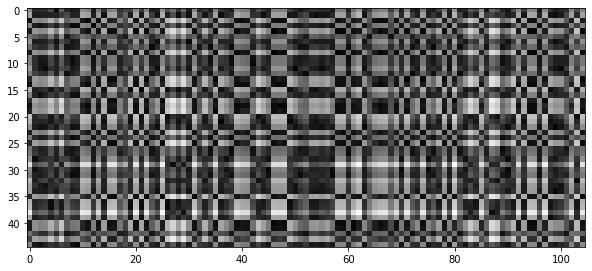

In [21]:
# 尝试计算一下测试集与训练集实例的距离
knn = KNearestNeighbor.KNearestNeighbor()
dists = knn.compute_distances(X_train, X_test, 2)
print(dists.shape)

# 对距离矩阵进行可视化展示
plt.imshow(dists, interpolation='none')
plt.show()

In [22]:
y_test_pred = knn.predict_labels(y_train, dists, k=2)
# y_test_pred = y_test_pred.reshape((-1, 1))
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, X_test.shape[0], accuracy))

Got 44 / 45 correct => accuracy: 0.977778


In [25]:
# 尝试一下使用5折交叉验证来选择最优的k值
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
best_k, k_to_accuracies = knn.k_cross_validation(X_train, y_train, num_folds, k_choices, p=2)

k = 1, accuracy = 0.857143
k = 1, accuracy = 0.952381
k = 1, accuracy = 0.952381
k = 1, accuracy = 0.904762
k = 1, accuracy = 1.000000
k = 3, accuracy = 0.904762
k = 3, accuracy = 0.952381
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.904762
k = 3, accuracy = 1.000000
k = 5, accuracy = 0.857143
k = 5, accuracy = 0.952381
k = 5, accuracy = 1.000000
k = 5, accuracy = 0.904762
k = 5, accuracy = 1.000000
k = 8, accuracy = 0.904762
k = 8, accuracy = 0.952381
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.904762
k = 8, accuracy = 1.000000
k = 10, accuracy = 0.904762
k = 10, accuracy = 0.952381
k = 10, accuracy = 1.000000
k = 10, accuracy = 0.857143
k = 10, accuracy = 1.000000
k = 12, accuracy = 0.904762
k = 12, accuracy = 0.952381
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.904762
k = 12, accuracy = 1.000000
k = 15, accuracy = 0.857143
k = 15, accuracy = 0.952381
k = 15, accuracy = 1.000000
k = 15, accuracy = 0.952381
k = 15, accuracy = 1.000000
k = 20, accuracy = 0.857143
k = 20, accu

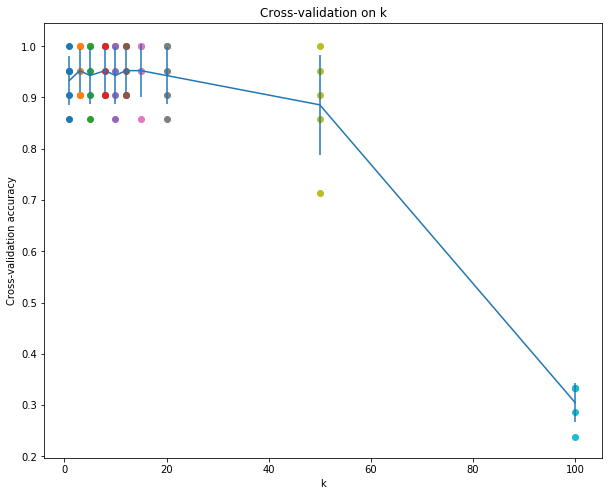

In [26]:
# 对不同k值下的分类准确率进行可视化展示
def Show(k_to_accuracies):
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.show()


Show(k_to_accuracies)